In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data= pd.read_csv(r'C:\Users\Shiva\Desktop\ExcelR assignments\Simple Linear Regression\delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.shape

(21, 2)

In [4]:
data.size

42

In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
##Performing EDA on Data

In [7]:
data1 = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
data1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
data1.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
data1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [12]:
##let us plot the data to check the outliers

C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\4204664771.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


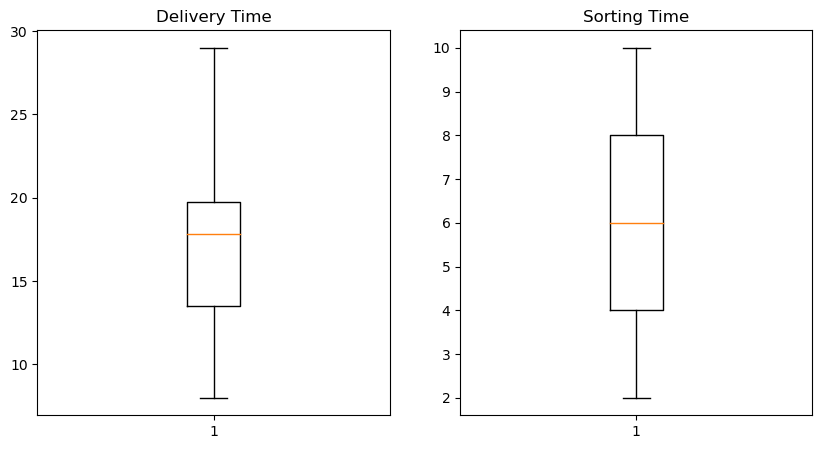

In [13]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [14]:
## no outliers
## checking the correlations btw variables

In [15]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [16]:
## correlation is good score is more than 0.8, let us visualize the correlation

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

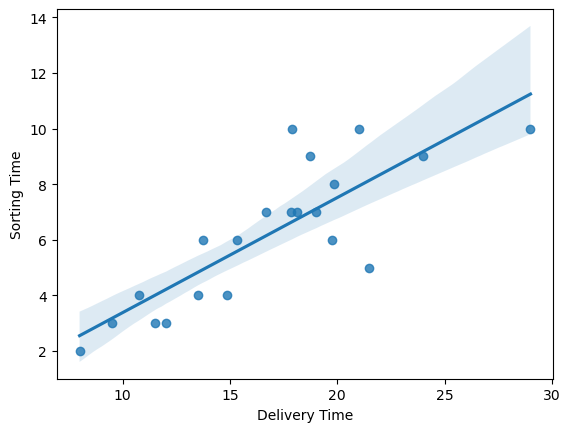

In [17]:
sb.regplot(x=data['Delivery Time'],y=data['Sorting Time'])

In [18]:
## let us check the homoscedasticity & heteroscadasticity

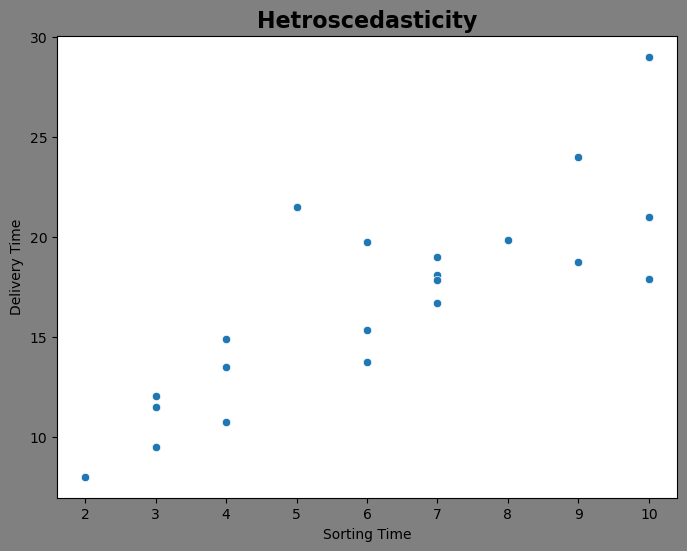

In [19]:
plt.figure(figsize = (8,6), facecolor = 'grey')
sb.scatterplot(x = data['Sorting Time'], y = data['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [20]:
##here the delivery time increases with sorting time , error is not constant across the values of dependent variable ,
## hence we can't say it exhibits the homoscadasticity

In [21]:
data.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [22]:
##Feature Engineering
## trying different transformation to remove skewness and for a normal distributioabsn

C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\2805117525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Delivery Time'], bins = 10, kde = True)


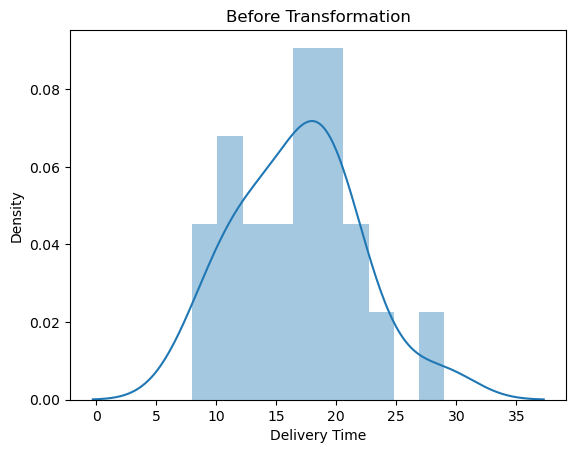

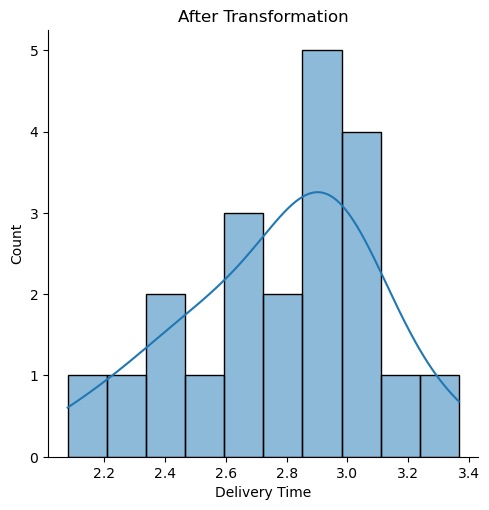

In [23]:
sb.distplot(data['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sb.displot(np.log(data['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\187768964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Delivery Time'], bins = 10, kde = True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\187768964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data['Delivery Time']

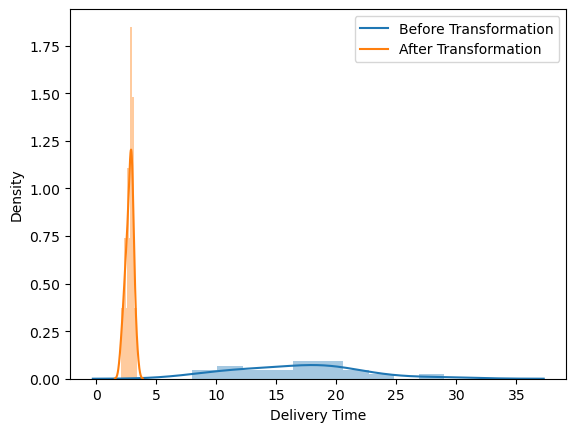

In [24]:
labels = ['Before Transformation','After Transformation']
sb.distplot(data['Delivery Time'], bins = 10, kde = True)
sb.distplot(np.log(data['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\678290302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Delivery Time'], bins = 10, kde = True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\678290302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.sqrt(data['Delivery Time'

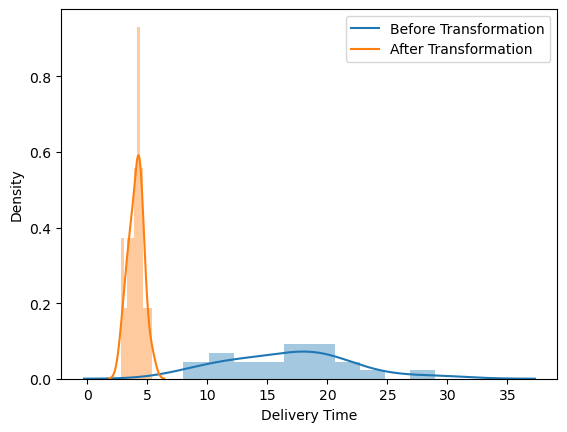

In [25]:
labels = ['Before Transformation','After Transformation']
sb.distplot(data['Delivery Time'], bins = 10, kde = True)
sb.distplot(np.sqrt(data['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\3734489669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Delivery Time'], bins = 10, kde = True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_17040\3734489669.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.cbrt(data['Delivery Tim

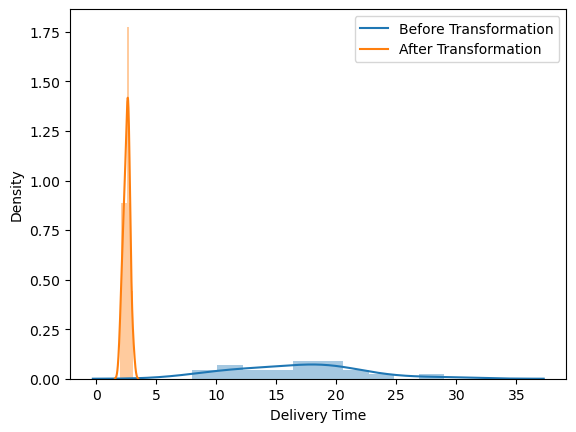

In [26]:
labels = ['Before Transformation','After Transformation']
sb.distplot(data['Delivery Time'], bins = 10, kde = True)
sb.distplot(np.cbrt(data['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

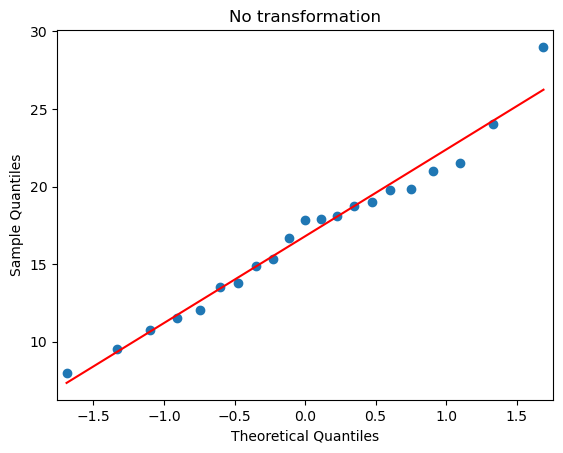

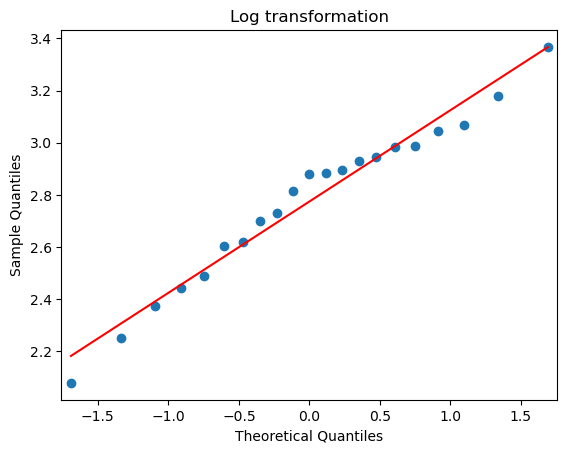

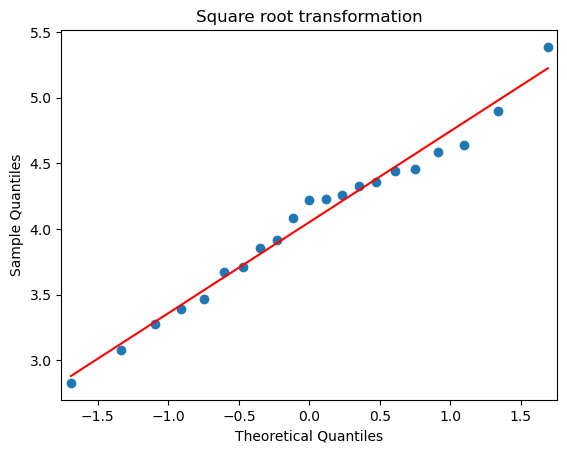

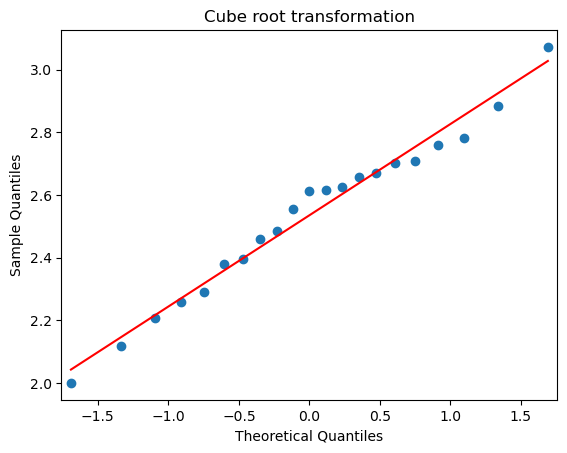

In [27]:
sm.qqplot(data['Delivery Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['Delivery Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['Delivery Time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()


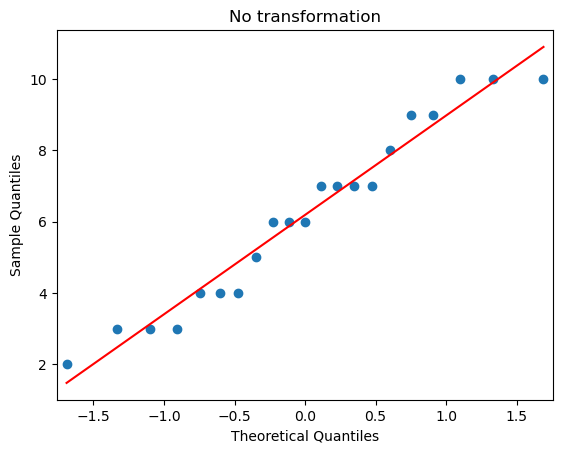

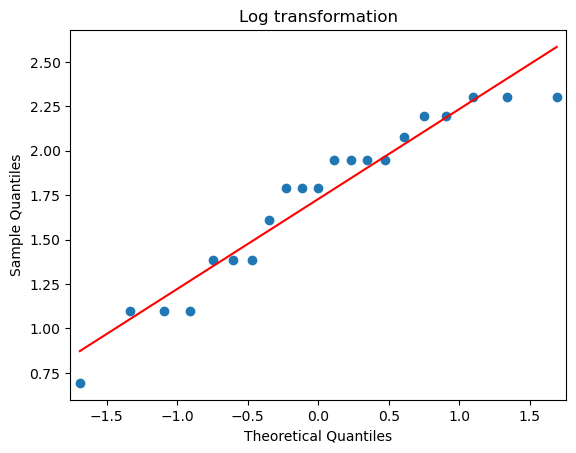

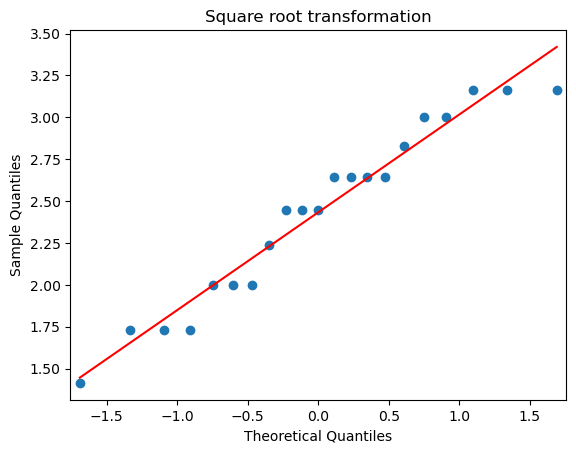

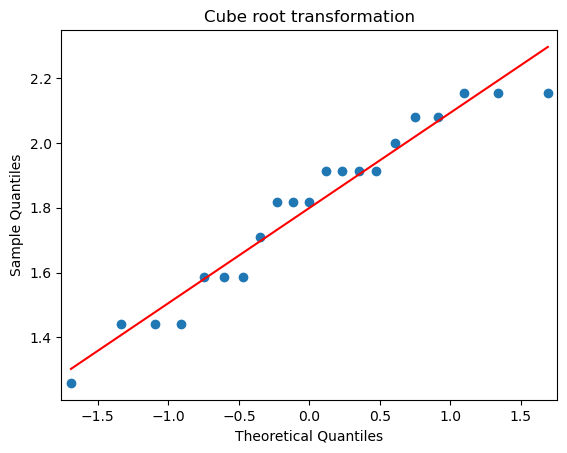

In [28]:
sm.qqplot(data['Sorting Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['Sorting Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['Sorting Time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [29]:
##Fitting Linear Regression
## using OLS

In [30]:
model=smf.ols('Delivery_Time~Sorting_Time',data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        20:00:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
##the model to predict well the adj rsquared & rsquared value should be more than 0.8
## let us try sqaure root transformation

In [32]:
model1=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data = data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 04 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                           20:00:15   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',data = data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 04 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                            20:00:15   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3=smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)',data = data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Mon, 04 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                            20:00:15   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
## as we can see log transformation is giving the values closer to 0.8 compared to other transformation,
## log transformtion can be considered as a good fit.

In [36]:
##Predicting the delivery time without any transformation


In [38]:
Delivery_Time_pred = pd.DataFrame()
Delivery_Time_pred['Sorting_Time'] = data1.Sorting_Time
Delivery_Time_pred['Delivery_Time'] = data1.Delivery_Time
Delivery_Time_pred['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(Delivery_Time_pred.Sorting_Time))
Delivery_Time_pred

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [ ]:
##Predicting the delivery time with log transformation


In [89]:
del_pred = pd.DataFrame()
del_pred['Sorting_Time'] = data1.Sorting_Time
del_pred['Delivery_Time'] = data1.Delivery_Time
del_pred['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model1.predict(del_pred.Sorting_Time)))
del_pred

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [41]:
##checking manually

In [42]:
model1.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [43]:
model1.tvalues , model1.pvalues

(Intercept               13.085552
 np.log(Sorting_Time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(Sorting_Time)    1.601539e-07
 dtype: float64)

In [44]:
model1.rsquared

0.77216134926874

In [45]:
model1.rsquared_adj

0.7601698413355158

In [101]:
np.exp(0.597522)-1

0.817609179730743

In [111]:
manual_model1=1.741987+(np.exp(0.597522)*10)
manual_model1

19.91807879730743

In [68]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [84]:
##without transformation
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [98]:
mp=6.582734+1.649020*9
mp

21.423914